# Starting Point

With the ever expanding market, alot of people are opening businesses left and right and as with all businesses, hving capital is necessary. However, not everyone goes to banks for business related loans, some hve purchases they'd like to make or payments for various reasons. As such banks are ready and willing to hand out loans (money on credit) with respective repayment plans. However, in order for banks not to face finacial issues themselves, they cannot hand out loans to everyone. Only to those whodo not run the risk of being defaulters.

The purpose of this analysis is to analyse customers on whether they are a risk to being defaultersm using the german credit card dataset. Some of the questions to be answered using this analysis are as follows:

1. What age group is a higher risk of defaulting?
2. What level off work has a higher risk of defaulting?
3. At what amount does it become difficult for customers to fail to pay back?
4. What gender has higher risk of defaulting, what gender requests for loans the most?
5. Based on the amount of savings and checking, what category is at higher risk of defaulting?
6. How does repayment duration affect loan repayment
7. Based on product, what amount of money loaned ut becomes a risk
8. Does owning a house impact whether a person can get a loan and is it a risk to the banks?


In [ ]:
# upload dataset
from google.colab import files
upl = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


## Intial Data Inspection

This phase focuses on understanding the dataset's structure and contents, before deeper analysis.

In [ ]:
# iport libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read data
df = pd.read_csv('german_credit_data.csv')
# preview data
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
# shape of data
df.shape

(1000, 10)

In [ ]:
# statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [ ]:
# check for missing values
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
# missing value table
missing_data = df.isnull().sum()
missing_percentage = (missing_data/len(df))*100

# combine into a dataframe
missing_df = pd.DataFrame({
    'Column':missing_data.index,
    'Missing_Data':missing_data.values,
    'Missing_Percentage':missing_percentage.values
})
# filter data
missing_df = missing_df[missing_df['Missing_Percentage'] > 0]
# sort the data from descending
missing_df.sort_values(by='Missing_Percentage', ascending=False)
# Reset index for a clean look
missing_df.reset_index(drop=True, inplace=True)
# showcase data
missing_df

,Column,Missing_Data,Missing_Percentage
0,Saving accounts,183,18.3
1,Checking account,394,39.4


In [ ]:
# check for duplicated data
df.duplicated().sum()

np.int64(0)

From the inspection, the dataset comprises of 1000 entries with 10 features/columns.On closer inspection, the minimum age for one to request for a loan is 19 years old, which makes sense.
The minimum amount loaned is 250$ and minimum duration of loan repayment is 4 months.
This information showcases that the data  does not have inconsistencies and unrealistic entries, as of this phase.

However the data does contain missing values within the savings and checking amount features. With 18.3% and 39.4% of the data missing.
One close inspection, i believe the mssing values account for users who had no money ine either account as such the missing values will be accounted as not_reported, (they did not have any money or they dont have an account at all).

In [ ]:
# replace missing values
df['Checking account'].fillna('not_reported', inplace=True) # checking account
df['Saving accounts'].fillna('not_reported', inplace=True) # savings account

# final check of  missing values
df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
# replacing job numerial valuw with respective titles
job_map = {
    0: 'unskilled and non-resident',
    1: 'unskilled and resident',
    2: 'skilled',
    3: 'highly skilled'
}
df['Job'] = df['Job'].map(job_map)
# preview new data
df.head(4)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,not_reported,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,not_reported,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good


# Data visualizations

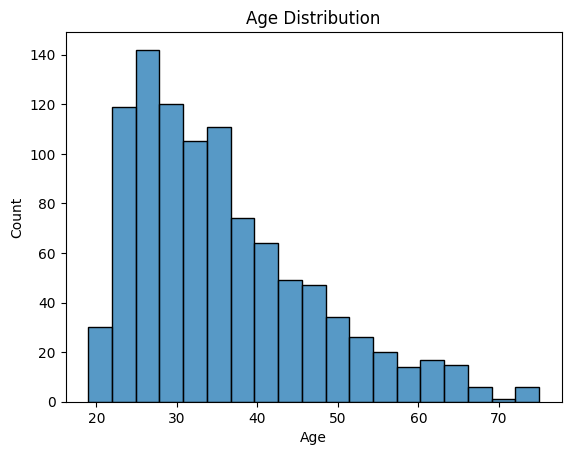

In [ ]:
# Age distribution
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

Most of those who take out loans are in the age 23 to 40

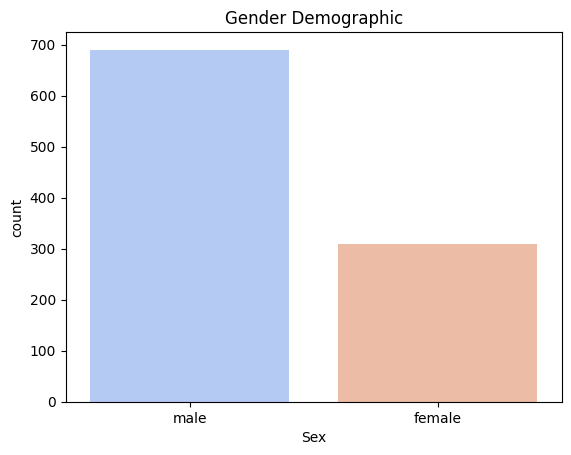

In [ ]:
# gender demographic
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title('Gender Demographic')
plt.show()

Most of the people who take out loans are male

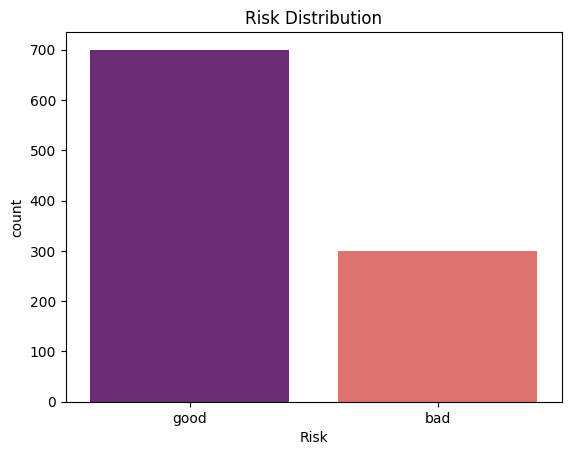

In [ ]:
# risk distribution
sns.countplot(x='Risk', data=df, palette='magma')
plt.title('Risk Distribution')
plt.show()

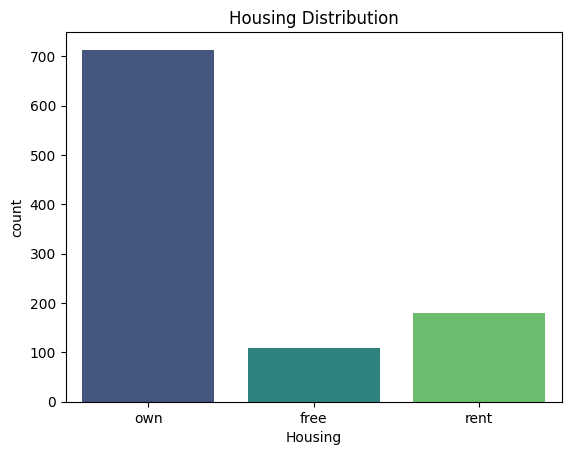

In [ ]:
# housing distribution
sns.countplot(x='Housing', data=df, palette='viridis')
plt.title('Housing Distribution')
plt.show()

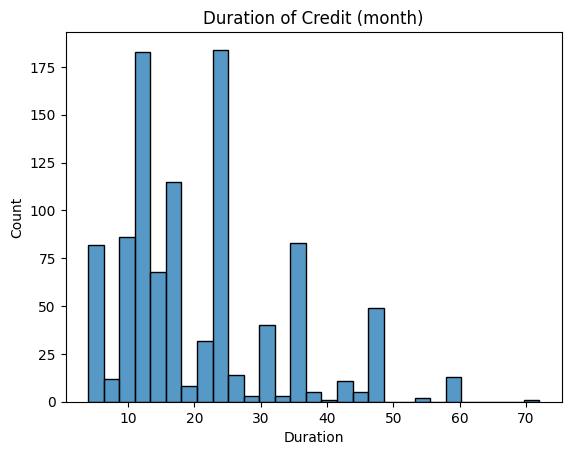

In [ ]:
# duration hist plot
sns.histplot(df['Duration'],palette='magma')
plt.title('Duration of Credit (month)')
plt.show()

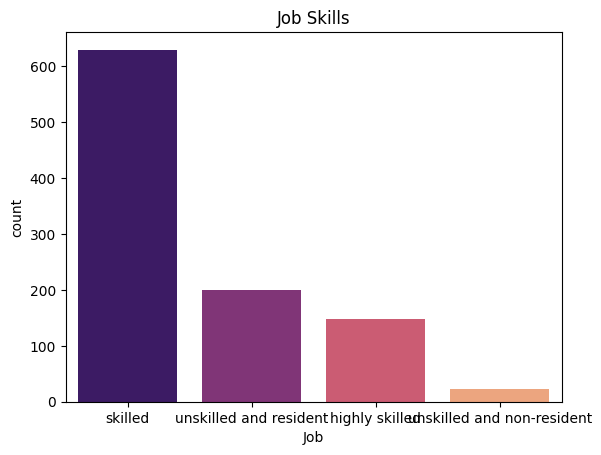

In [ ]:
# job skills piechart
sns.countplot(x='Job', data=df, palette='magma')
plt.title('Job Skills')
plt.show()

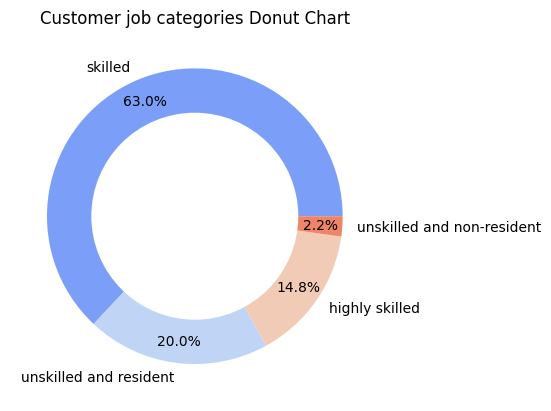

In [ ]:
#v value counts
job_count = df['Job'].value_counts()
# job category pie plot
plt.pie(job_count, labels=job_count.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(job_count)), pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Creating the "donut hole"
plt.title('Customer job categories Donut Chart')
plt.show()

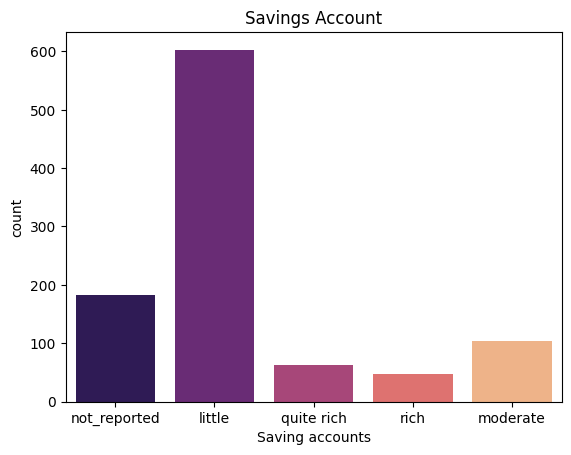

In [ ]:
# savings acount
sns.countplot(x='Saving accounts', data=df, palette='magma')
plt.title('Savings Account')
plt.show()
#

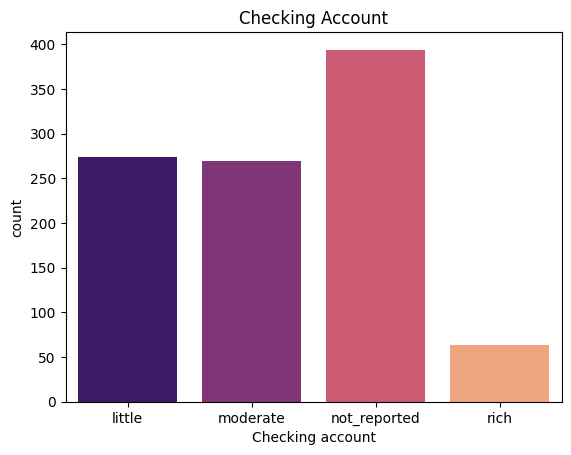

In [ ]:
# checking account
sns.countplot(x='Checking account', data=df, palette='magma')
plt.title('Checking Account')
plt.show()
#

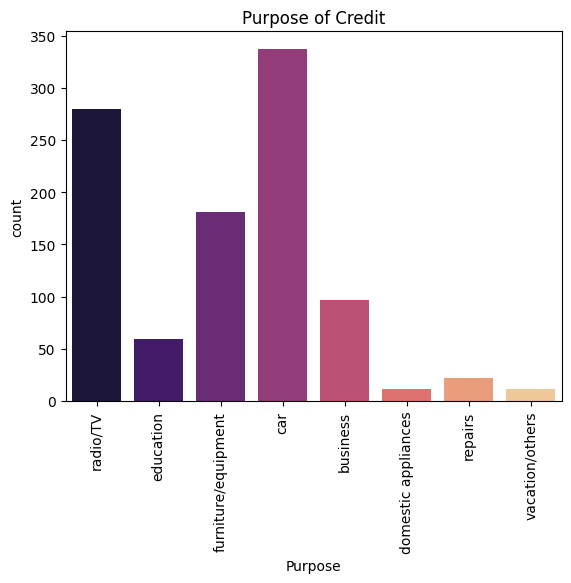

In [ ]:
# purpose of credit
sns.countplot(x='Purpose', data=df, palette='magma',orient='horizontal')
plt.title('Purpose of Credit')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# download exl
df.to_excel('cleaned_data.xlsx', index=False)

# answering some of the anal ques

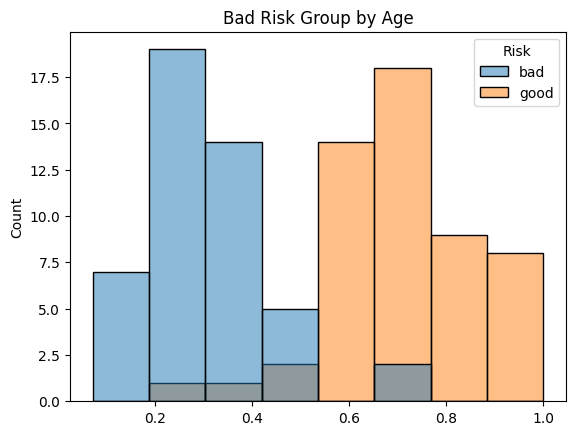

In [ ]:
# bad risk group by age
bad_risk_age = df.groupby('Age')['Risk'].value_counts(normalize=True).unstack()
bad_risk_age
sns.histplot(data=bad_risk_age)
plt.title('Bad Risk Group by Age')
plt.show()

In [ ]:
bad_risk_age.sort_values(by='bad', ascending=False)

Risk,bad,good
Age,,
53,0.714286,0.285714
68,0.666667,0.333333
19,0.500000,0.500000
60,0.500000,0.500000
25,0.463415,0.536585
24,0.431818,0.568182
61,0.428571,0.571429
23,0.416667,0.583333
22,0.407407,0.592593


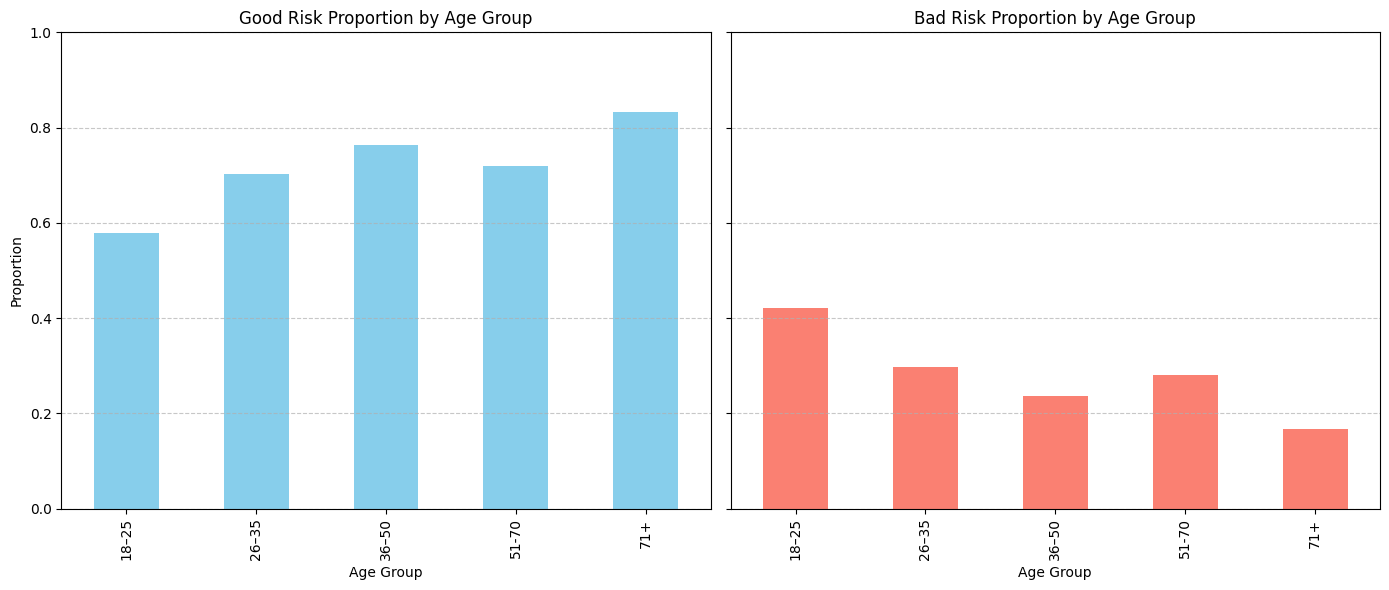

In [ ]:
# create age bins
bins = [18, 25, 35, 50, 70,100]
# define age labels
labels = ['18–25', '26–35', '36–50', '51-70','71+']
# create new column know as age group and assign bins
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# get arisk by age
age_group_risk = df.groupby('age_group')['Risk'].value_counts(normalize=True).unstack()
# bad risk age grpoup
bad_risk_by_age_group = age_group_risk['bad']
# good ge-group
good_risk_by_age_group = age_group_risk['good']

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
age_group_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
age_group_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
job_risk_group = df.groupby('Job')['Risk'].value_counts(normalize=True).unstack()
job_risk_group

Risk,bad,good
Job,,
highly skilled,0.344595,0.655405
skilled,0.295238,0.704762
unskilled and non-resident,0.318182,0.681818
unskilled and resident,0.280000,0.720000


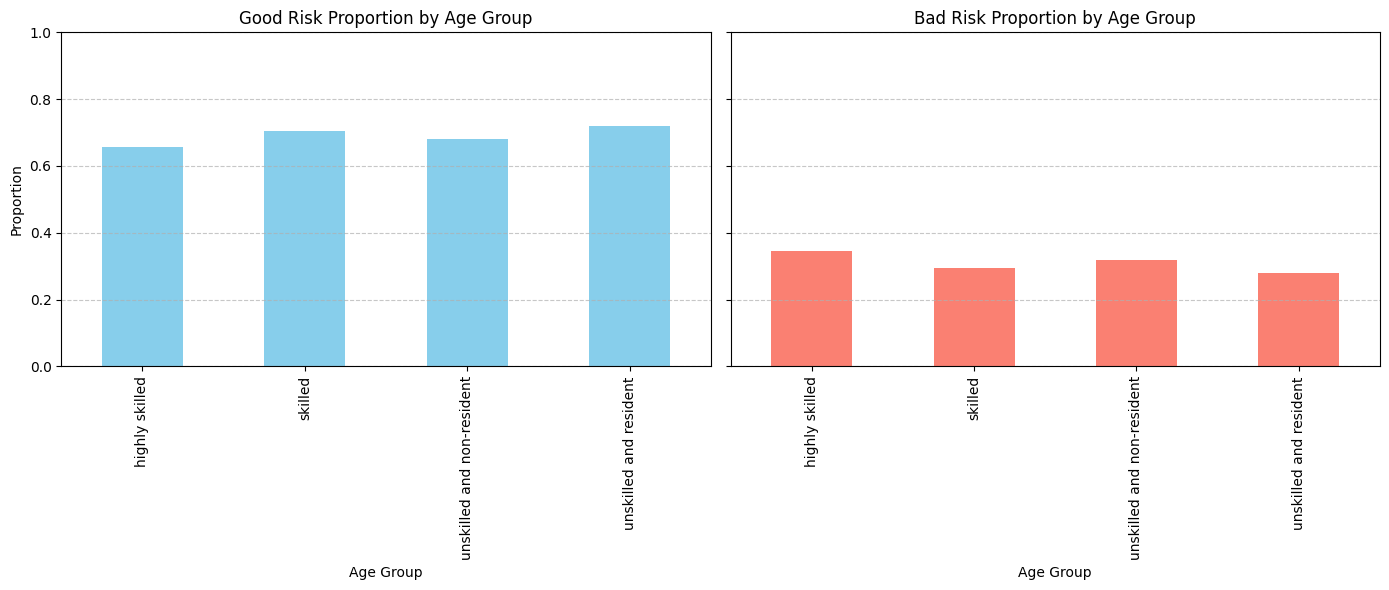

In [ ]:
# good ge-group
good_job_risk_group = job_risk_group['good']

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
job_risk_group['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
job_risk_group['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# amount bins
df['Credit amount']. min()

250

In [ ]:
df['Credit amount']. max()

18424

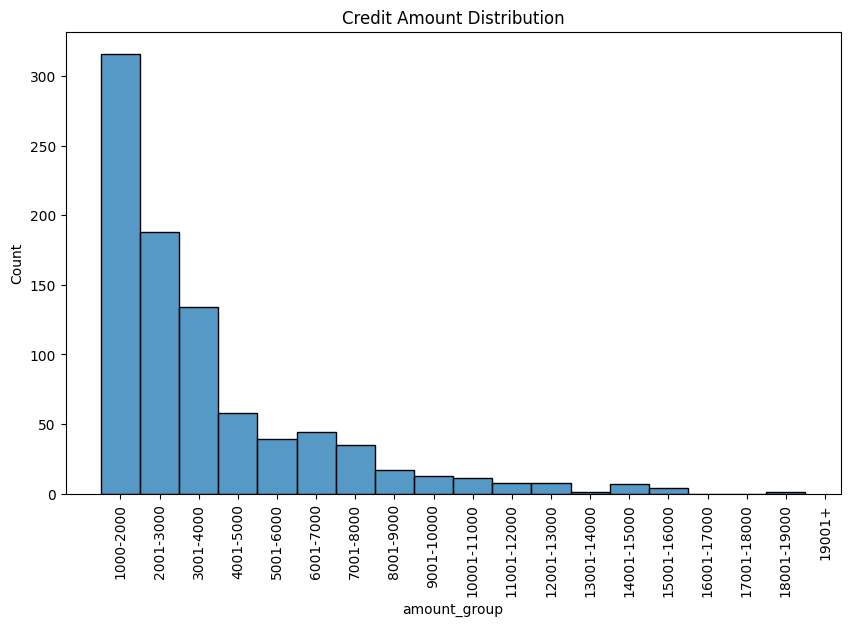

In [ ]:
# create bins
credit_bin = [1000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
credit_bin_2 = [1000, 2000,3000,4000,5000,6000,7000,8000,9000,10000
                , 11000,12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
# bin labels
credit_labels = ['1000-2500', '2501 - 5000', '5001 - 7500', '7501 - 10000', '10001 - 12500', '12501 - 15000', '15001-17500','17501+']
credit_labels_2 = [
    '1000-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001-8000','8001-9000','9001-10000',
    '10001-11000','11001-12000','12001-13000','13001-14000','14001-15000','15001-16000','16001-17000','17001-18000',
    '18001-19000','19001+'
]
# assign bins
df['amount_group'] = pd.cut(df['Credit amount'], bins=credit_bin_2, labels=credit_labels_2)
# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['amount_group'])
plt.xticks(rotation=90)
plt.title('Credit Amount Distribution')
plt.show()

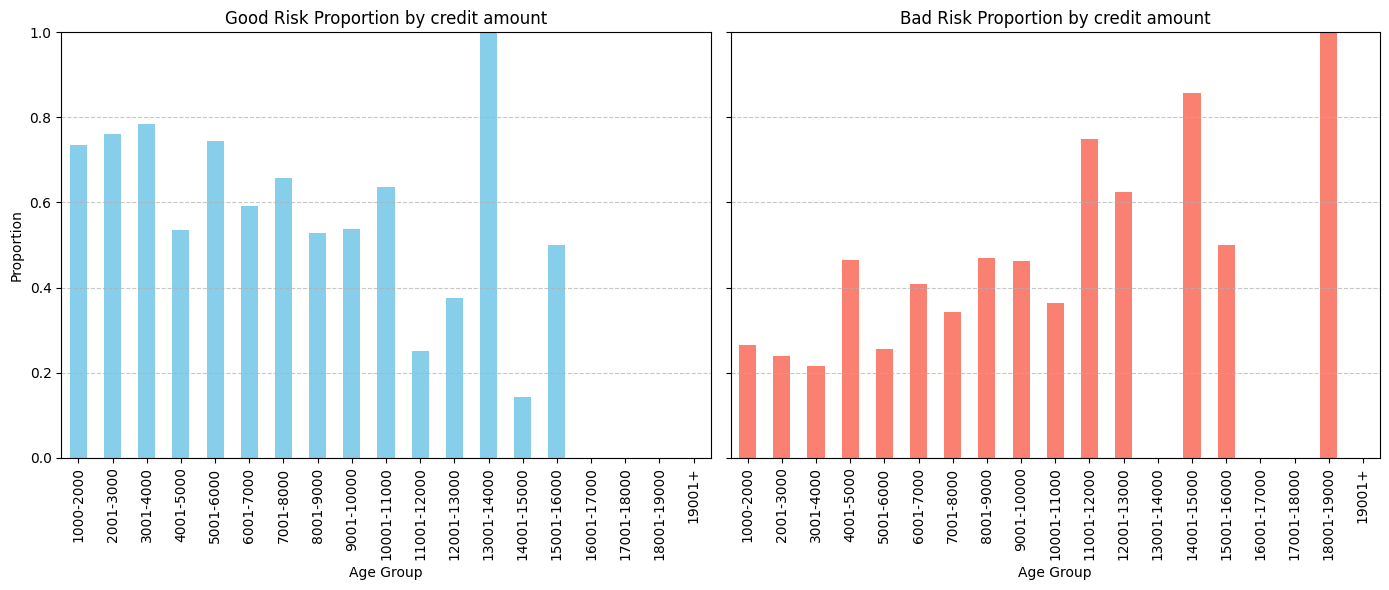

In [ ]:
# credit amount and risk
credit_amount_risk = df.groupby('amount_group')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
credit_amount_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by credit amount')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
credit_amount_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by credit amount')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

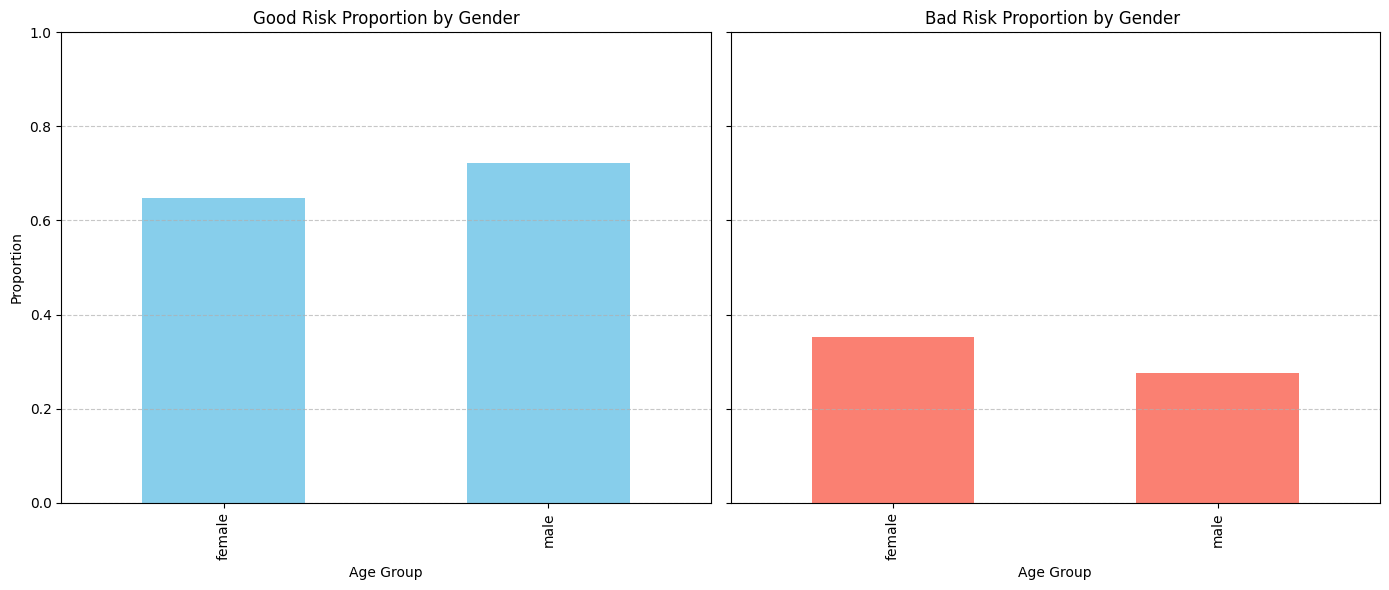

In [ ]:
# credit amount and risk
gender_risk = df.groupby('Sex')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
gender_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Gender')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
gender_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Gender ')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
df['Duration'].max()

72

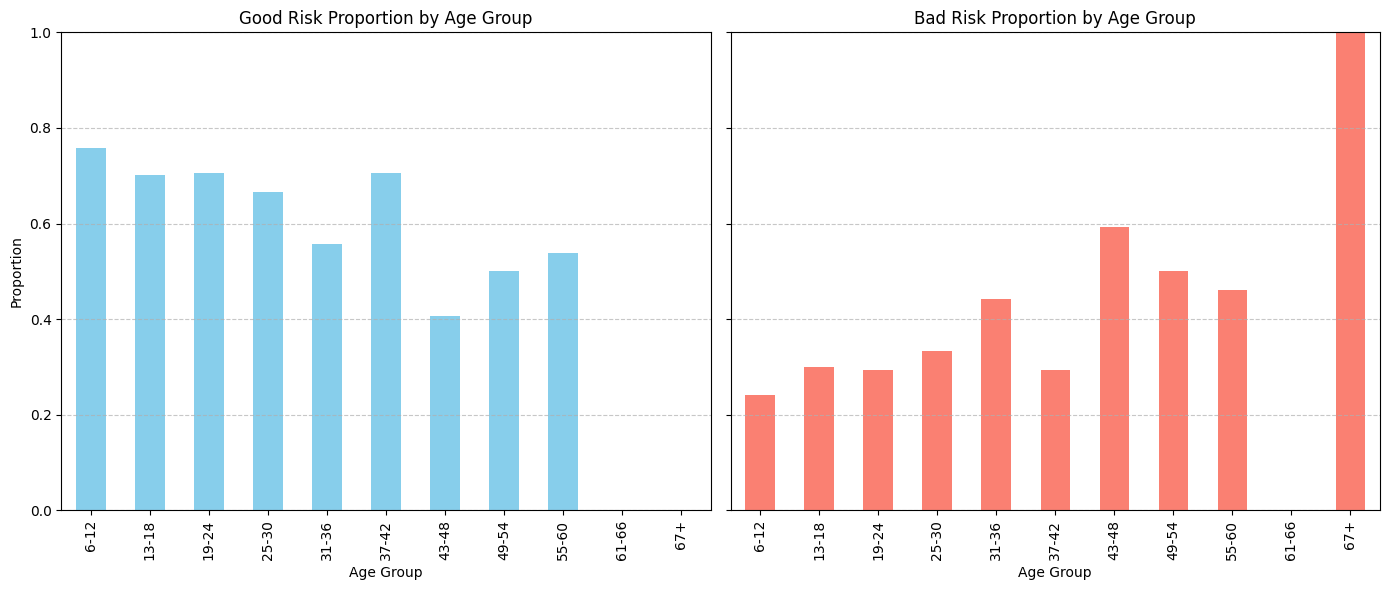

In [ ]:
# duration of pay and risk
# create duration bin
duration_bin = [6,12,18,24,30,36,42,48,54,60,66,72]
# create duration labels
duration_labels = ['6-12','13-18','19-24','25-30','31-36','37-42','43-48','49-54','55-60','61-66','67+']
# create new column know as age group and assign bins
df['duration_group'] = pd.cut(df['Duration'], bins=duration_bin, labels=duration_labels)

# get arisk by age
duration_group_risk = df.groupby('duration_group')['Risk'].value_counts(normalize=True).unstack()
# bad risk age grpoup
bad_risk_by_duration = duration_group_risk['bad']
# good ge-group
good_risk_by_duration = duration_group_risk['good']

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
duration_group_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
duration_group_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

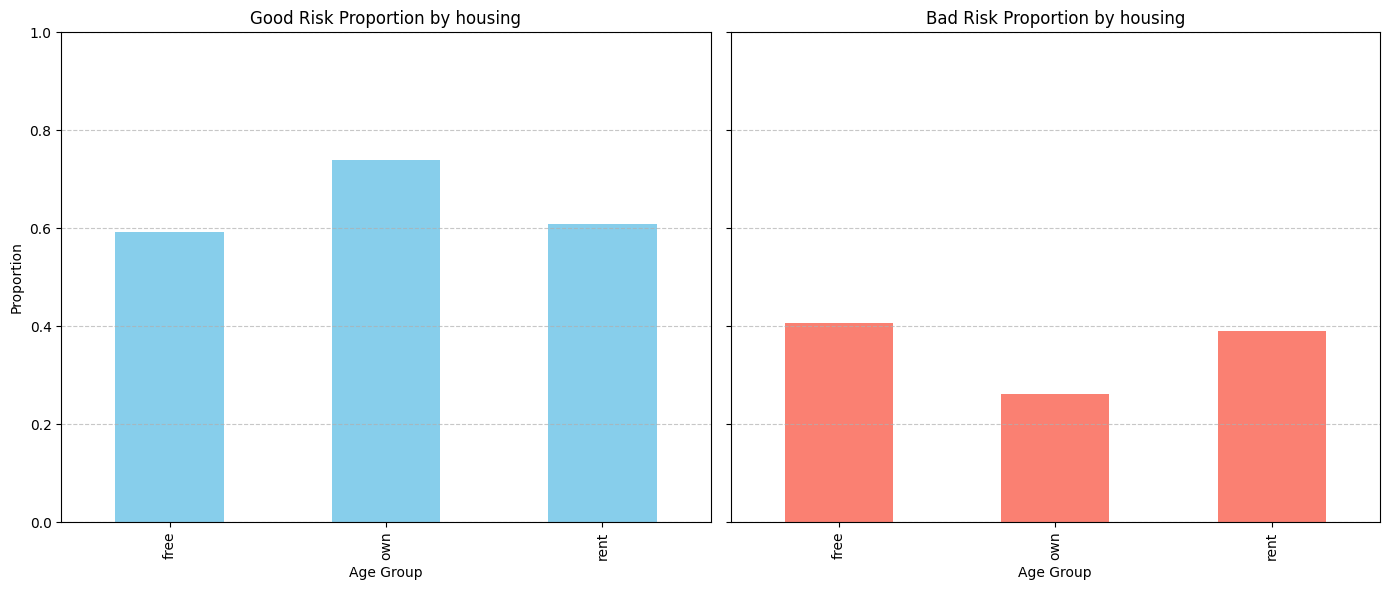

In [ ]:
# housing and risk
Housing_risk = df.groupby('Housing')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
Housing_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by housing')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
Housing_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by housing')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

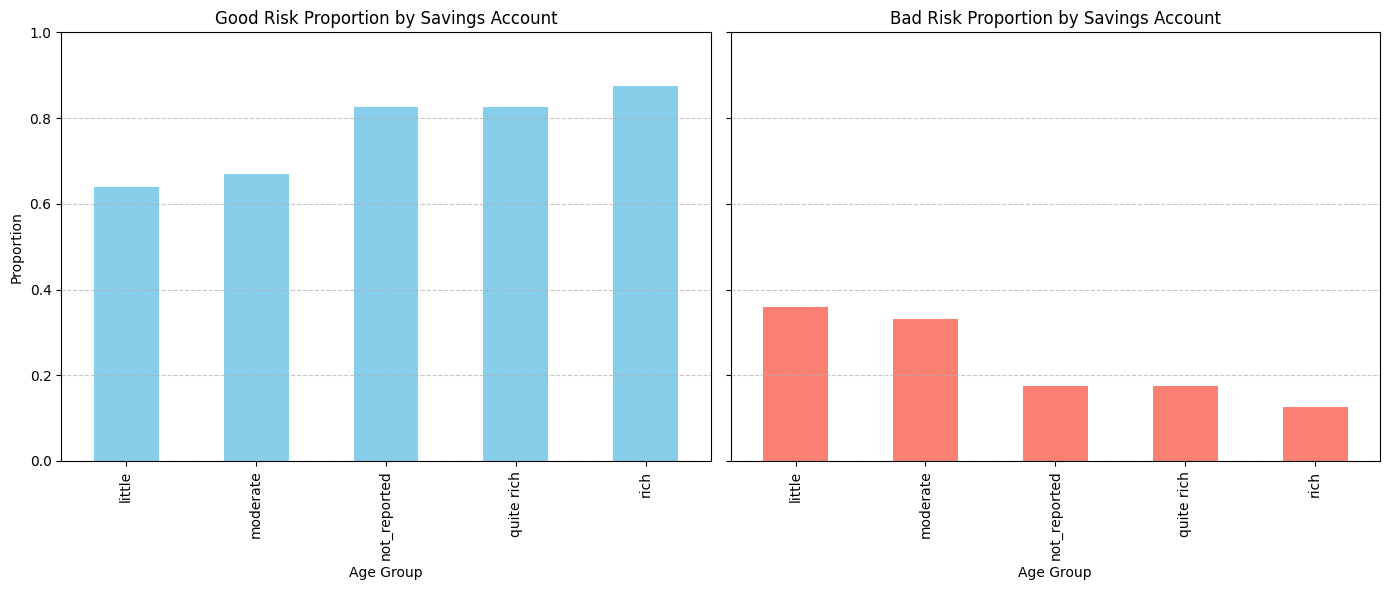

In [ ]:
# savings and risk
Savings_risk = df.groupby('Saving accounts')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
Savings_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Savings Account')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
Savings_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Savings Account')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


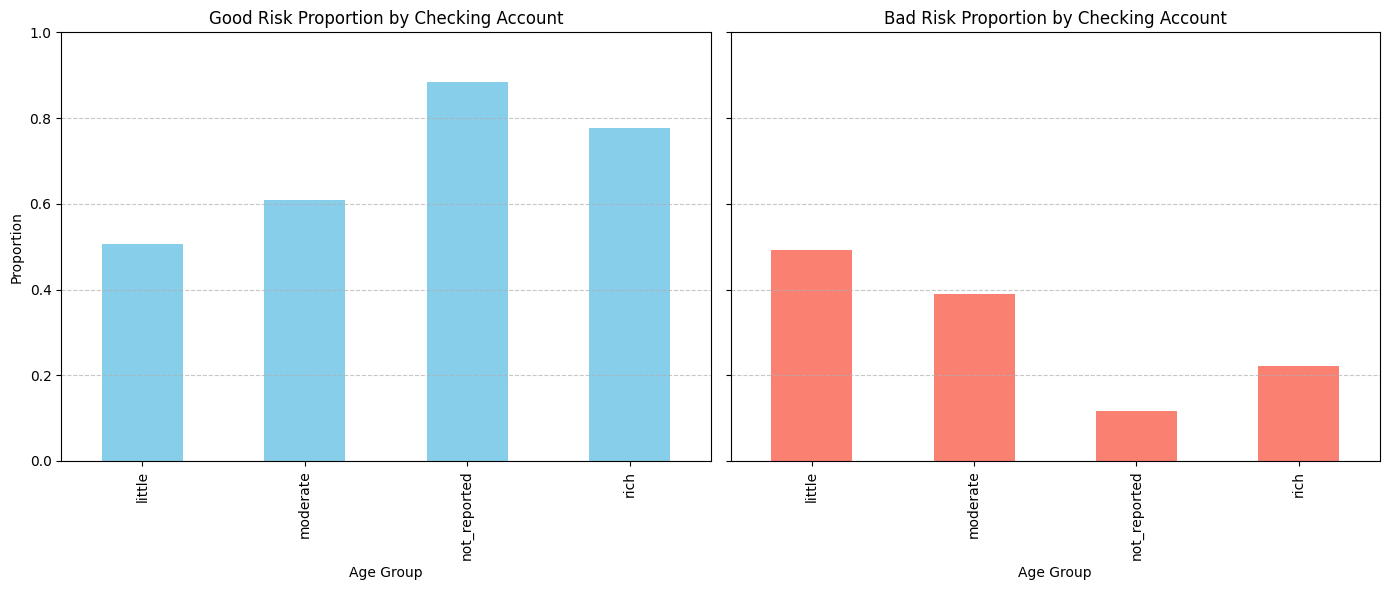

In [ ]:
#Checking account and risk
Checking_risk = df.groupby('Checking account')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
Checking_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Checking Account')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
Checking_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Checking Account')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


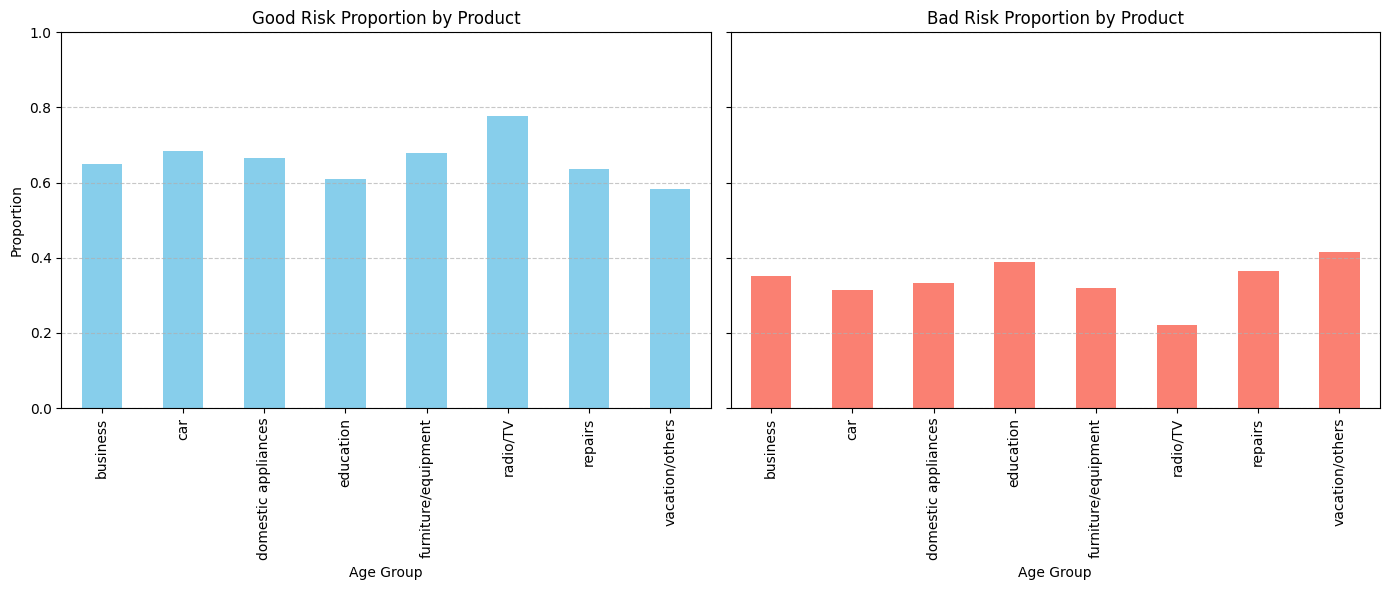

In [ ]:
#Checking account and risk
Purpose_risk = df.groupby('Purpose')['Risk'].value_counts(normalize=True).unstack()

# plot age group by risk
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot good risk
Purpose_risk['good'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Good Risk Proportion by Product')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Proportion')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bad risk
Purpose_risk['bad'].plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Bad Risk Proportion by Product')
ax2.set_xlabel('Age Group')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Data Preparation for Predictive Modeling

In [ ]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,age_group,amount_group,duration_group
0,67,male,skilled,own,not_reported,little,1169,6,radio/TV,good,51-70,1000-2000,NaN
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,18–25,5001-6000,43-48
2,49,male,unskilled and resident,own,little,not_reported,2096,12,education,good,36–50,2001-3000,6-12
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,36–50,7001-8000,37-42
4,53,male,skilled,free,little,little,4870,24,car,bad,51-70,4001-5000,19-24


In [ ]:
# droping unneeded columns
cols_to_drop = ['age_group',	'amount_group',	'duration_group']
df = df.drop(columns=cols_to_drop)
# preview new data
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,not_reported,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and resident,own,little,not_reported,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


In [ ]:
# dealing with outliers
cols_for_check = ['Age','Credit amount','Duration']
# outlier removal function
def outlier_replacement(df,columns):
  df_cleaned = df.copy()
  # loop to get the quartile ranges of each column
  for col in columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1 # iqr

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # instead of losing data, converting the outliers to lower and upper bound values seems to be more efficient
    df_cleaned[col] = df_cleaned[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    return df_cleaned

# replace outlier
outlier_replacement(df, cols_for_check)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,64.5,male,skilled,own,not_reported,little,1169,6,radio/TV,good
1,22.0,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49.0,male,unskilled and resident,own,little,not_reported,2096,12,education,good
3,45.0,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53.0,male,skilled,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31.0,female,unskilled and resident,own,little,not_reported,1736,12,furniture/equipment,good
996,40.0,male,highly skilled,own,little,little,3857,30,car,good
997,38.0,male,skilled,own,little,not_reported,804,12,radio/TV,good
998,23.0,male,skilled,free,little,little,1845,45,radio/TV,bad


In [ ]:
# encoding categorical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# label encoder
lc = LabelEncoder()
# columns for encoders
xd_cols = ['Sex','Risk']
df[xd_cols] = df[xd_cols].apply(lc.fit_transform)
# preview new data
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,skilled,own,not_reported,little,1169,6,radio/TV,1
1,22,0,skilled,own,little,moderate,5951,48,radio/TV,0
2,49,1,unskilled and resident,own,little,not_reported,2096,12,education,1
3,45,1,skilled,free,little,little,7882,42,furniture/equipment,1
4,53,1,skilled,free,little,little,4870,24,car,0


In [ ]:
# onehot encoding of remaining categorical values
df = pd.get_dummies(df, columns=['Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Job'])
# preview new data
df.head(5)

,Age,Sex,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident
0,67,1,1169,6,1,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,22,0,5951,48,0,False,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,49,1,2096,12,1,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
3,45,1,7882,42,1,True,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,53,1,4870,24,0,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df = df.astype(int)
# preview new data
df.head(5)

,Age,Sex,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident
0,67,1,1169,6,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,22,0,5951,48,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45,1,7882,42,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,53,1,4870,24,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Modelling

In [ ]:
from os import X_OK
# split the data
Features = df.drop('Risk', axis=1)
Target = df['Risk']
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Training
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred_log = Log_reg.predict(X_test)

# Evaluation
log_accuracy = round(accuracy_score(y_test, y_pred_log),2)
log_precision = round(precision_score(y_test, y_pred_log),2)
log_recall = round(recall_score(y_test, y_pred_log),2)
log_f1 = round(f1_score(y_test, y_pred_log),2)

# print resutls
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48        59
           1       0.78      0.90      0.84       141

    accuracy                           0.75       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200



In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

# instantiate and train
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# evaluate
tree_accuracy = round(accuracy_score(y_test, y_pred_tree),2)
tree_precision =round( precision_score(y_test, y_pred_tree),2)
tree_recall = round(recall_score(y_test, y_pred_tree),2)
tree_f1 = round(f1_score(y_test, y_pred_tree),2)

# print resutls
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50        59
           1       0.80      0.72      0.75       141

    accuracy                           0.67       200
   macro avg       0.62      0.64      0.63       200
weighted avg       0.69      0.67      0.68       200



In [ ]:
# xgboost classifier
from xgboost import XGBClassifier

# instantiate and train
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# evaluate
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb),2)
xgb_precision = round(precision_score(y_test, y_pred_xgb),2)
xgb_recall = round(recall_score(y_test, y_pred_xgb),2)
xgb_f1 = round(f1_score(y_test, y_pred_xgb),2)

# print results
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.46      0.53        59
           1       0.80      0.89      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.75      0.76      0.75       200



In [ ]:
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression": [log_accuracy, log_precision, log_recall, log_f1],
    "Decision Tree": [tree_accuracy, tree_precision, tree_recall, tree_f1],
    "XGBoost": [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

# Set the 'Metric' column as the index
results.set_index('Metric', inplace=True)
results

,Logistic Regression,Decision Tree,XGBoost
Metric,,,
Accuracy,0.75,0.67,0.76
Precision,0.78,0.80,0.80
Recall,0.90,0.72,0.89
F1 Score,0.84,0.75,0.84


# Model tuning and Hyperparameters

In [ ]:
# Logistic Hyperparameters
from sklearn.model_selection import GridSearchCV
# Initialize model
log_reg_2 = LogisticRegression(solver='liblinear')

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_2,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
# Hyper parameter accuracy
log_reg_2_accuracy = round(accuracy_score(y_test, y_pred),2)
log_reg_2_accuracy

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.61      0.34      0.43        59
           1       0.77      0.91      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.62      0.63       200
weighted avg       0.72      0.74      0.71       200



0.74

In [ ]:
# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search_xgb = GridSearchCV(estimator=xgb,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='f1',
                               verbose=1)

# Fit model
grid_search_xgb.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

xgb2_accuracy = round(accuracy_score(y_test, y_pred_xgb),2)
xgb2_accuracy

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.80      0.34      0.48        59
           1       0.78      0.96      0.86       141

    accuracy                           0.78       200
   macro avg       0.79      0.65      0.67       200
weighted avg       0.78      0.78      0.75       200



0.78

In [ ]:

# Initialize model
dtree = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Grid search
grid_search_dt = GridSearchCV(estimator=dtree,
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring='f1',
                              verbose=1)

# Fit model
grid_search_dt.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)
best_dtree = grid_search_dt.best_estimator_
y_pred_dt = best_dtree.predict(X_test)
print(classification_report(y_test, y_pred_dt))

dt2_accuracy = round(accuracy_score(y_test, y_pred_dt),2)
dt2_accuracy

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters (Decision Tree): {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.53      0.31      0.39        59
           1       0.75      0.89      0.81       141

    accuracy                           0.71       200
   macro avg       0.64      0.60      0.60       200
weighted avg       0.69      0.71      0.69       200



0.71

In [ ]:
# \
df.head(5)

,Age,Sex,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Job_highly skilled,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident
0,67,1,1169,6,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,22,0,5951,48,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,49,1,2096,12,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45,1,7882,42,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,53,1,4870,24,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# hyper parameter final results
resutl_hyp = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Logistic Regression": [log_reg_2_accuracy],
    "Decision Tree": [dt2_accuracy],
    "XGBoost": [xgb2_accuracy]
})# result preview of hyperparametized models
resutl_hyp

,Metric,Logistic Regression,Decision Tree,XGBoost
0,Accuracy,0.74,0.71,0.78
